# CNNs

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
# dataset
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), # transform data
    target_transform=None # trtansform labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(), # transform data
    target_transform=None # trtansform labels/targets
)

In [68]:
from torch import relu


class FashionMNISTModelV2(nn.Module):
    def __init__(self, 
                input_shape: int,
                hidden_unit: int,
                output_shape: int 
                ) :
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1), # Hyperparameters, i.e we can set those params
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride = 1,
                      padding = 1
                      ),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride = 1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # LAst layer in cnn is calleed classifier layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [69]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [70]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [71]:
torch.manual_seed(57)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_unit=10,
                              output_shape=len(class_names)).to(device)

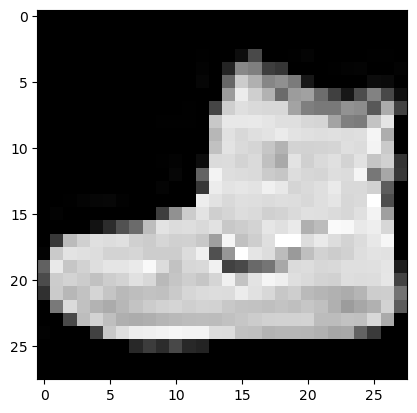

In [72]:
plt.imshow(image.squeeze(), cmap='gray')

In [73]:
# pass the image
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape


torch.Size([1, 28, 28])

In [74]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[ 0.0141,  0.0325,  0.0656,  0.0091, -0.0087,  0.0757, -0.0757, -0.0459,
          0.0132, -0.0366]], device='cuda:0', grad_fn=<AddmmBackward0>)

stepping through `nn.Conv2d()`

In [27]:
torch.manual_seed(57)

#create batch of images

images = torch.randn(size=(32,3,64,64))
test_image = images[0]


print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 0.7094, -1.1486, -0.0637,  ...,  0.7423, -0.7711, -0.4804],
         [-0.6039,  0.1917,  0.3200,  ...,  0.7440, -0.4644, -1.2416],
         [-1.0319, -1.8434,  0.4371,  ...,  2.6640, -1.1534, -0.4945],
         ...,
         [ 0.9501, -1.2368,  1.0202,  ...,  0.2037, -0.8646, -1.3502],
         [-0.5543,  1.1962,  0.4343,  ..., -0.4357,  1.9938, -0.0437],
         [-0.3313, -0.4563,  1.5271,  ..., -0.8431, -1.2001, -0.8136]],

        [[ 0.7109, -1.6260, -0.6550,  ...,  0.6846,  1.7491,  0.9845],
         [-1.7032,  0.7965,  2.5987,  ...,  0.0510,  0.9484, -0.2657],
         [-0.4505,  1.1712, -1.2147,  ...,  1.7294, -0.2391,  1.3302],
         ...,
         [-0.9742,  1.0104, -2.7187,  ..., -1.8866, -0.4041,  1.7091],
         [-0.1797,  0.4212, -2.0139,  ..., -1.6896,  0.1493,

In [31]:
torch.manual_seed(57)

#single conv later
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding = 1)

# pass data through conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

Stepping through `nn.MaxPool2d()`

In [33]:
test_image.shape

torch.Size([3, 64, 64])

In [35]:
# print out OG image without unsqueeze
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# create sample nn.MaxPool layer

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass through conv only
test_image_from_conv = conv_layer(test_image.unsqueeze(dim=0))

#pass thourgh max pool layer
print(f"Shape after going through conv_layer(): {test_image_from_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_from_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [40]:
torch.manual_seed(57)
# create rand rtensor similar to images
random_tensor = torch.randn(size=(1,1,2,2))

print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass through maxpool 
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[ 0.1446, -0.1165],
          [ 0.6929, -0.9161]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.6929]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### Loss function and optimizer for `model_2` 

In [ ]:
#18:28:00